# Excercise 1

In Excercise 1 we create a basic model to predict if a request is eligible to be a customer of  Sustaino.

First we load our data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

start_df = pd.read_csv('./clean-loan-data.csv', low_memory=False)

pd.set_option('display.max_columns', None)

df = start_df.copy(deep=True)
df.head()

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_month,issue_year,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line_month,earliest_cr_line_year,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_month,last_pymnt_year,last_pymnt_amnt,next_pymnt_month,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec,2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan,1985.0,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan,2015.0,171.62,NaN,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec,2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr,1999.0,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr,2013.0,119.66,NaN,NaN,Sep,2013.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec,2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov,2001.0,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun,2014.0,649.91,NaN,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec,2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb,1996.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan,2015.0,357.48,NaN,NaN,Jan,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec,2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan,1996.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan,2016.0,67.79,Feb,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


We then specify our target. If credit did default, it is not eligible, otherwise it is.

In [2]:
df['TARGET'] = [0 if i=='Default' else 1 for i in df['loan_status']]

We only want to consider 'loan_amnt' and 'annual_inc' since these can be queried in our form

In [3]:
df.drop(df.columns.difference(['loan_amnt', 'annual_inc', 'TARGET']), 1, inplace=True)

In [4]:
df = df.dropna()
df = pd.get_dummies(df)


## Train-Test Split

We split our model to have data for verifing our model after training

In [5]:
from sklearn.model_selection import train_test_split
X_train = df.drop('TARGET',axis=1)
y_train = df['TARGET']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1),df['TARGET'],test_size=0.15,random_state=101,  stratify=df['TARGET'])

We use a StandardScaler to scale our input

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Oversampling of minority class

Since our data is higly inbalanced we use SMOTE [Synthetic Minority Oversampling Technique](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) to oversample our training data

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_resample(X_train, y_train)

## Train first model

We train our first model and evaluate its performance on our test data

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=12)

In [11]:
cross_validate(log_reg, x_train_r, y_train_r, cv=3, scoring=('accuracy', 'recall'))

{'fit_time': array([0.21831846, 0.20198464, 0.20621133]),
 'score_time': array([0.1154635 , 0.11629343, 0.11339068]),
 'test_accuracy': array([0.57204648, 0.57115034, 0.57263708]),
 'test_recall': array([0.47597559, 0.47241683, 0.47261199])}

In [12]:
log_reg.fit(x_train_r, y_train_r)
confusion_matrix(y_test, log_reg.predict(X_test))

array([[  116,    67],
       [69791, 63133]])

In [13]:
log_reg.predict([[50000, 20000]])

array([0])

Our model is pretty bad. But we can improve that later. Our focus is on providing the infrastructure to be able to iterate quickly to enable improvement of our model while providing value to our customers.

## Excercise 1: Create Pipeline

Now that we trained our first model we want to create an inference pipeline that combines the use of the StandardScaler and our LogisticRegression model.

1. Create a sklearn pipeline using the function [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).

2. Fit this pipeline on our training data `x_train_r`, `y_train_r`
3. Calculate the confusion matrix using `confusion_matrix(y_test, eligibility_pipeline.predict(X_test))`

[[  116    67]
 [69667 63257]]


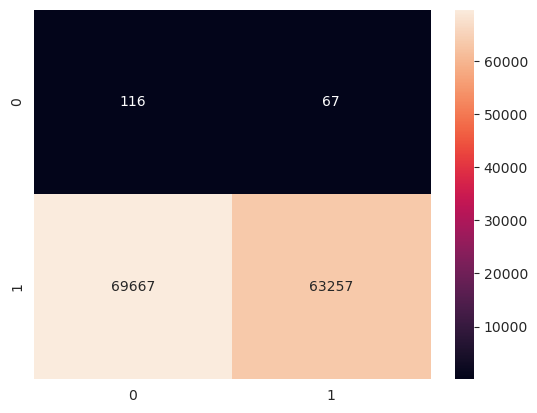

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LogisticRegression(C = 0.0001,random_state=12))
model = pipeline.fit(x_train_r, y_train_r)
cm = confusion_matrix(y_test, pipeline.predict(X_test))
print(cm)


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation


## Excercise 2: Store model

To be able to use our model at a later time we need to store the model.

sklearn recommends storing model pipelines using a pyhton library called joblib. So lets do that.

store your pipeline at `'models/eligibility_pipeline.joblib`.

Use the documentation here: https://scikit-learn.org/stable/modules/model_persistence.html#python-specific-serialization

Load the pipeline again and execute predict on your model. Does it still do the same?

In [18]:
from joblib import dump, load
dump(model, 'models/eligibility_pipeline.joblib')

['models/eligibility_pipeline.joblib']

In [19]:
model = load('models/eligibility_pipeline.joblib')
model.predict([[50000, 20000]])

array([0])

In [25]:
model.predict([[150000, 10000]])

array([0])

In [26]:
model.predict([[150000, 100000]])

array([1])